# TP05 Memoïsation
## Introduction
Les fonctions `fibo_iter` et `fibo_rec`  calculent la n*ième* valeur de Fibonacci en appliquant respectivement l’algorithme itératif et l’algorithme récursif.

In [2]:
import time
import matplotlib.pyplot as plt

In [3]:
def fibo_iter(n):
    """Version itérative du calcul de Fibonacci."""
    a, b = 0, 1
    for _ in range(n):
        a, b = b, a + b
    return a

In [4]:
def fibo_rec(n):
    """Version récursive du calcul de Fibonacci."""
    if n < 2:
        return n
    return fibo_rec(n - 1) + fibo_rec(n - 2)

1) Mesurer les temps de restitution de `fibo_iter` et `fibo_rec` pour des valeurs progressives de `n` (10, 20, 30, 35,...).

In [5]:
values_n = [5, 10, 15, 20, 25, 30]
execution_times_iter = []
execution_times_rec = []

for n in values_n:
    tic = time.time()
    a = fibo_iter(n)
    toc = time.time()
    execution_times_iter.append(toc-tic)

    tic = time.time()
    a = fibo_rec(n)
    toc = time.time()
    execution_times_rec.append(toc-tic)

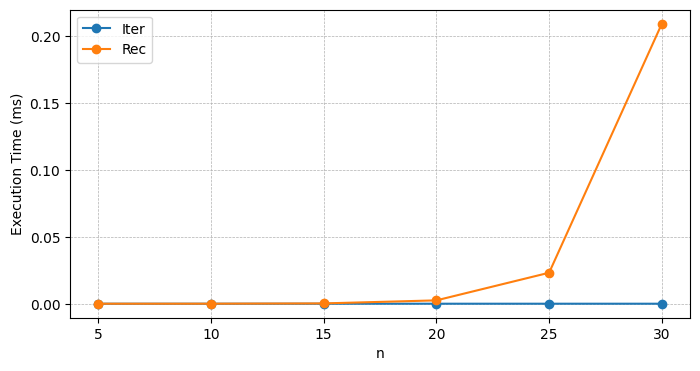

In [6]:
plt.figure(figsize=(8, 4))
plt.plot(values_n, execution_times_iter, marker='o', label=f'Iter')
plt.plot(values_n, execution_times_rec, marker='o', label=f'Rec')
plt.xlabel('n')
plt.ylabel('Execution Time (ms)')
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

On voit que le temps d’exécution de la méthode récursive croît de façon exponentielle avec l’augmentation de la valeur de n, ce qui la rend irréalisable pour des valeurs très grandes.

## Mémoïsation
La mémoïsation est une technique qui consiste à stocker les résultats d'appels de fonctions déjà calculés afin d'éviter de les recalculer le cas échéant.

2. Sur la base de `fibo_rec`
   1. Ecrire une fonction `fibo_memo` qui utilise un dictionnaire pour stocker les différentes valeurs de fibonacci calculées lors des appels récursifs. Mesurer et comparer les temps de restitution.

In [7]:
def fibo_memo(n, mem):
    """Version récursive du calcul de Fibonacci avec Momoization."""
    if n in mem:
        return mem[n]
    
    if n < 2:
        return n
    
    mem[n] = fibo_memo(n - 1, mem) + fibo_memo(n - 2, mem)
    
    return mem[n]

In [8]:
execution_times_mem = []

for n in values_n:
    mem = {}
    tic = time.time()
    a = fibo_memo(n, mem)
    toc = time.time()
    execution_times_mem.append(toc-tic)

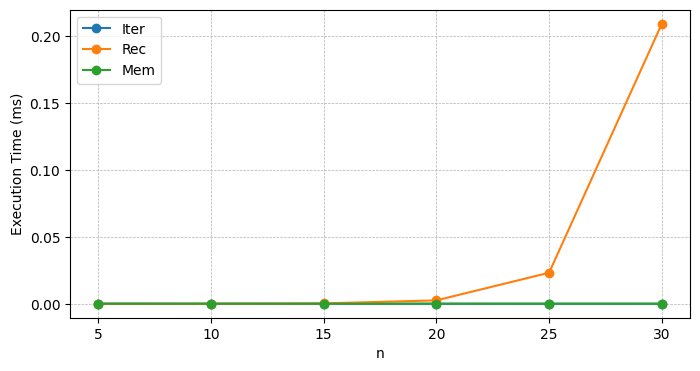

In [9]:
plt.figure(figsize=(8, 4))
plt.plot(values_n, execution_times_iter, marker='o', label=f'Iter')
plt.plot(values_n, execution_times_rec, marker='o', label=f'Rec')
plt.plot(values_n, execution_times_mem, marker='o', label=f'Mem')
plt.xlabel('n')
plt.ylabel('Execution Time (ms)')
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

In [10]:
print(execution_times_iter)
print(execution_times_mem)

[2.86102294921875e-06, 1.1920928955078125e-06, 1.430511474609375e-06, 1.9073486328125e-06, 4.291534423828125e-06, 5.7220458984375e-06]
[2.6464462280273438e-05, 4.76837158203125e-06, 8.106231689453125e-06, 9.059906005859375e-06, 1.4781951904296875e-05, 1.430511474609375e-05]


La Mémoïsation a rendu l'impact de la récursion beaucoup plus faible, car elle facilite l'accès aux résultats déjà calculés. Cela garantit que les résultats de fibo_memo sont du même ordre de grandeur que les résultats itératifs.

2.
   2. Le package `functools` de python propose une solution automatique de memoïsation à l'aide du décorateur `lru_cache`. Ecrire une fonction `fibo_lru` qui utilise ce décorateur. Mesurer et comparer les temps de restitution.

In [10]:
from functools import lru_cache

@lru_cache(maxsize = 128) 
def fibo_lru(n): 
    if n < 2: 
        return n 
    return fibo_lru(n-1) + fibo_lru(n-2) 

In [11]:
values_n = [5, 10, 15, 20, 25, 30, 50, 100]
execution_times_lru = []
execution_times_iter = []
execution_times_mem = []

for n in values_n:
    tic = time.time()
    a = fibo_lru(n)
    toc = time.time()
    execution_times_lru.append(toc-tic)

    tic = time.time()
    a = fibo_iter(n)
    toc = time.time()
    execution_times_iter.append(toc-tic)

    mem = {}
    tic = time.time()
    a = fibo_memo(n, mem)
    toc = time.time()
    execution_times_mem.append(toc-tic)

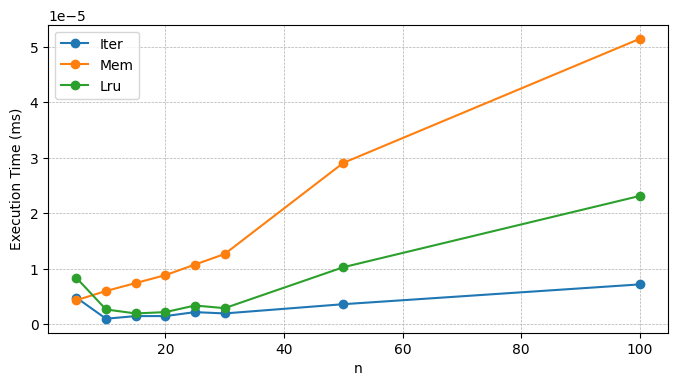

In [12]:
plt.figure(figsize=(8, 4))
plt.plot(values_n, execution_times_iter, marker='o', label=f'Iter')
plt.plot(values_n, execution_times_mem, marker='o', label=f'Mem')
plt.plot(values_n, execution_times_lru, marker='o', label=f'Lru')
plt.xlabel('n')
plt.ylabel('Execution Time (ms)')
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

Les résultats itératifs ont toujours les temps d’exécution les plus courts, mais la fonction Lru présente de meilleurs résultats que la méthode récursive. Cela peut être dû au fait que le cache dispose d'un accès à la mémoire plus optimisé que le dictionnaire de Mémoïsation.

## Accélération avec Numba (`njit`)

3. Compilation à la volée.
   1. Utiliser le décorateur `njit` pour compiler `fibo_iter` et `fibo_rec` à la volée. Comparer les temps de restitution.

In [13]:
from numba import njit, TypingError

@njit
def fibo_iter(n):
    """Version itérative du calcul de Fibonacci."""
    a, b = 0, 1
    for _ in range(n):
        a, b = b, a + b
    return a

@njit
def fibo_rec(n):
    """Version récursive du calcul de Fibonacci."""
    if n < 2:
        return n
    return fibo_rec(n - 1) + fibo_rec(n - 2)

In [14]:
values_n = [5, 10, 15, 20, 25, 30, 35, 40]
execution_times_iter = []
execution_times_rec = []

for n in values_n:
    tic = time.time()
    a = fibo_iter(n)
    toc = time.time()
    execution_times_iter.append(toc-tic)

    tic = time.time()
    a = fibo_rec(n)
    toc = time.time()
    execution_times_rec.append(toc-tic)

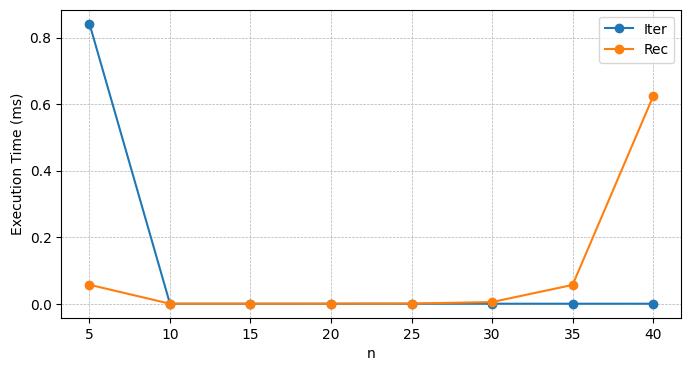

In [15]:
plt.figure(figsize=(8, 4))
plt.plot(values_n, execution_times_iter, marker='o', label=f'Iter')
plt.plot(values_n, execution_times_rec, marker='o', label=f'Rec')
plt.xlabel('n')
plt.ylabel('Execution Time (ms)')
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

En utilisant njit, on peut remarquer l'effet sérieux de la première exécution, mais aussi que le temps d'exécution de la méthode récursive reste proche de celui de la méthode itérative pour des valeurs de n plus grandes. Les résultats itératifs avec njit étaient globalement inférieurs à ceux sans njit observés précédemment.

3. Compilation à la volée.
    
    2. tenter une version *jitté* de `fibo_memo`. Quel est le problème. Contournez le en utilisant un `ndarray` ou bien un objet de type `Dict` de `numba.typed`. Comparer les temps de restitution.

In [16]:
@njit
def fibo_memo(n, mem):
    """Version récursive du calcul de Fibonacci."""
    if n in mem:
        return mem[n]
    
    if n < 2:
        return n
    
    mem[n] = fibo_memo(n - 1, mem) + fibo_memo(n - 2, mem)
    
    return mem[n]

In [17]:
execution_times_mem = []

try:
    for n in values_n:
        mem = {}
        tic = time.time()
        a = fibo_memo(n, mem)
        toc = time.time()
        execution_times_mem.append(toc-tic)
except TypingError as e:
        print(e)

Failed in nopython mode pipeline (step: nopython frontend)
non-precise type pyobject
During: typing of argument at /tmp/ipykernel_95823/174150921.py (1)

File "../../../../../../../../tmp/ipykernel_95823/174150921.py", line 1:
<source missing, REPL/exec in use?>

During: Pass nopython_type_inference 

This error may have been caused by the following argument(s):
- argument 1: Cannot determine Numba type of <class 'dict'>



La méthode njit ne prend pas en charge les dictionnaires natifs, mais nous pouvons utiliser une fonctionnalité de support.

In [27]:
from numba.typed import Dict
from numba.core import types

execution_times_mem = []
execution_times_iter = []

for n in values_n:
        mem = Dict.empty(
                        key_type=types.int64,
                        value_type=types.int64,
                        )
        tic = time.time()
        a = fibo_memo(n,mem)
        toc = time.time()
        execution_times_mem.append(toc-tic)

        tic = time.time()
        a = fibo_iter(n)
        toc = time.time()
        execution_times_iter.append(toc-tic)

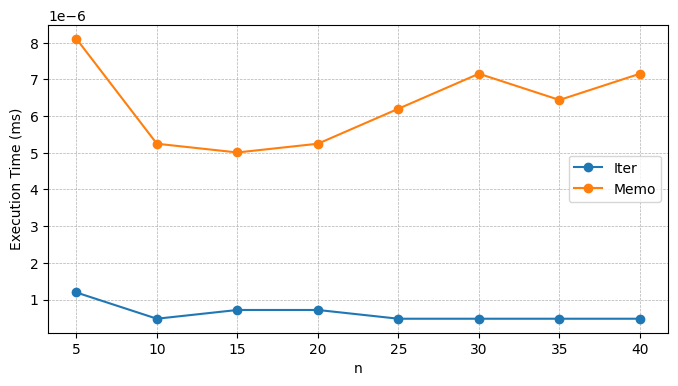

In [28]:
plt.figure(figsize=(8, 4))
plt.plot(values_n, execution_times_iter, marker='o', label=f'Iter')
# plt.plot(values_n, execution_times_rec, marker='o', label=f'Rec')
plt.plot(values_n, execution_times_mem, marker='o', label=f'Memo')
plt.xlabel('n')
plt.ylabel('Execution Time (ms)')
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

La version itérative reste la plus efficace, mais njit a également eu pour effet de réduire le temps d'exécution de la fonction avec Mémoïsation.

## Parallélisation multithreadée

4. Sur la base de la fonction non jitté `fibo_rec`.
   1. Ecrire une fonction récursive `fibo_thread` où chaque appel récursif est une tâche soumise à un thread d'un `ThreadPoolExecutor` via la méthode `submit`.
   2. Exécuter cette fonction pour des valeur de `n = 2, 3, 4, 5, 6, ...`. Quelles observations/problèmes ? 

In [29]:
from concurrent.futures import ThreadPoolExecutor

def fibo_thread(n, executor=None):
    """Version récursive de Fibonacci avec gestion des tâches via ThreadPoolExecutor."""
    if n < 2:
        return n
    
    with ThreadPoolExecutor() as executor:
        future1 = executor.submit(fibo_thread, n - 1, executor)
        future2 = executor.submit(fibo_thread, n - 2, executor)
        
        result1 = future1.result()
        result2 = future2.result()
        
        return result1 + result2

In [30]:
values_n = [5, 10, 15, 20, 25, 30]
execution_times_thread = []

for n in values_n:
    tic = time.time()
    a = fibo_thread(n)
    toc = time.time()
    execution_times_thread.append(toc-tic)

Le temps d'exécution est très élevé, même pour de petites valeurs de n, car un Deadlock se produit. Une tâche demande l'exécution d'une tâche suivante, mais cette tâche doit attendre dans la file d'attente des workers que la première soit exécutée. De cette façon, les deux tachês sont mis en pause.